# Importing Needed Libraries

In [1]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
from IPython.display import display, Markdown, Latex
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, Markdown
import collections
from keras import regularizers

# Explore and Visualize Data to Gain Insights

# Count Plot of Training Data in Dataset

<ipython-input-10-38a7bd85a35f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=data, palette=['red', 'blue', 'green', 'orange'])
<ipython-input-10-38a7bd85a35f>:26: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Class', y='Count', data=data, palette=['red', 'blue', 'green', 'orange'])


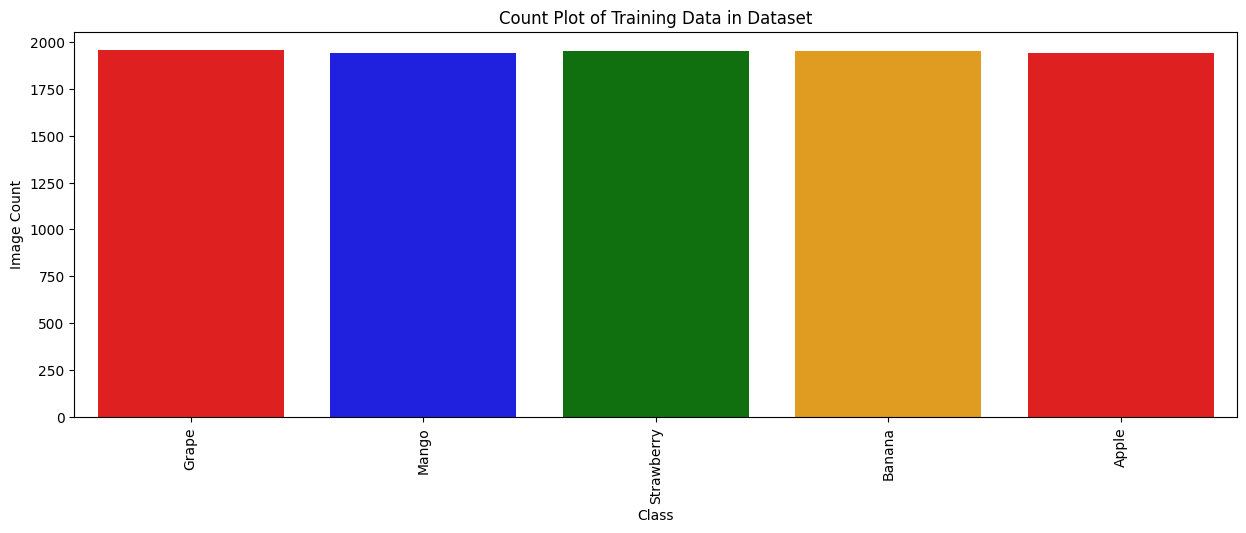

In [ ]:
# Display Markdown title
display(Markdown("# Count Plot of Training Data in Dataset"))

# Specify the training data path (folder containing the class folders)
train_path = '/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/train'  # Update with your training data path

# Create a dictionary to count the number of images per folder
image_counts = collections.defaultdict(int)

# Iterate through each folder in the training data path
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)

    # Check if it is a directory (folder)
    if os.path.isdir(folder_path):
        # Count the number of files (images) in the folder
        num_images = len(os.listdir(folder_path))
        image_counts[folder] = num_images

# Convert the dictionary to a DataFrame
data = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Count'])

# Plotting the count plot
plt.figure(figsize=(15, 5))
# sns.barplot(x='Class', y='Count', data=data, order=data.sort_values('Count', ascending=False)['Class'])
sns.barplot(x='Class', y='Count', data=data, palette=['red', 'blue', 'green', 'orange'])
plt.xticks(rotation=90)
plt.title("Count Plot of Training Data in Dataset")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.show()



# Count Plot of Testing Data in Dataset

<ipython-input-3-e0fbee71aeaf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=data, palette=['red', 'blue', 'green', 'orange'])
<ipython-input-3-e0fbee71aeaf>:26: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Class', y='Count', data=data, palette=['red', 'blue', 'green', 'orange'])


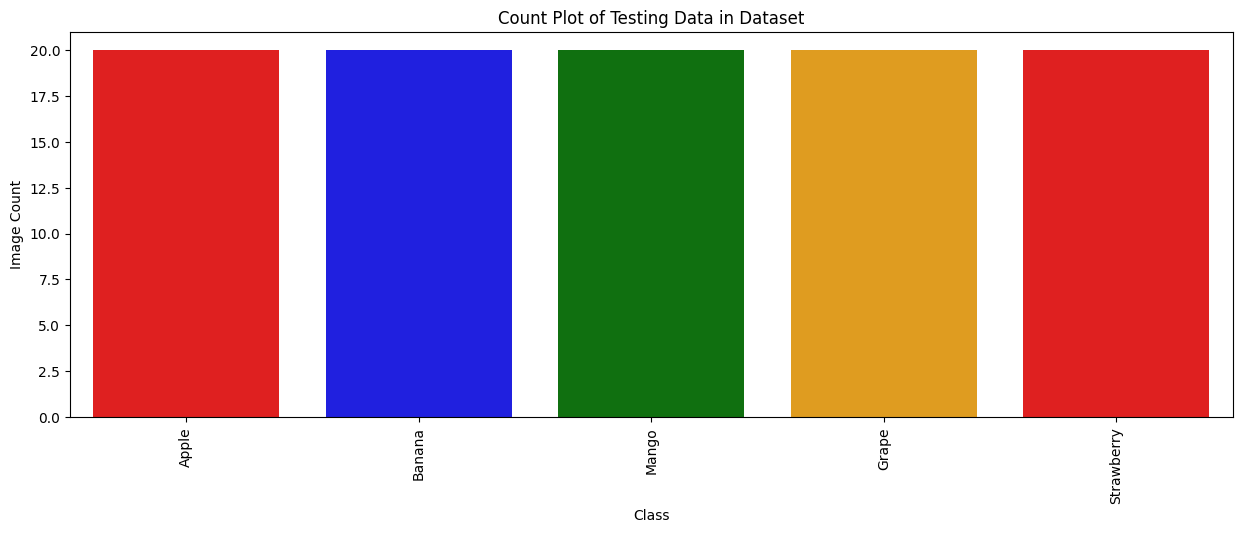

In [3]:
# Display Markdown title
display(Markdown("# Count Plot of Testing Data in Dataset"))

# Specify the training data path (folder containing the class folders)
train_path = '/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test'  # Update with your training data path

# Create a dictionary to count the number of images per folder
image_counts = collections.defaultdict(int)

# Iterate through each folder in the training data path
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)

    # Check if it is a directory (folder)
    if os.path.isdir(folder_path):
        # Count the number of files (images) in the folder
        num_images = len(os.listdir(folder_path))
        image_counts[folder] = num_images

# Convert the dictionary to a DataFrame
data = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Count'])

# Plotting the count plot
plt.figure(figsize=(15, 5))
# sns.barplot(x='Class', y='Count', data=data, order=data.sort_values('Count', ascending=False)['Class'])
sns.barplot(x='Class', y='Count', data=data, palette=['red', 'blue', 'green', 'orange'])
plt.xticks(rotation=90)
plt.title("Count Plot of Testing Data in Dataset")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.show()

# Model Implementation

**Loading and Preprocessing Data for Training, Validation, and Testing**

In [ ]:
# Define the paths to the training, validation, and test directories
train_dir = '/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/train'
val_dir = '/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/val'  # Optional validation set
test_dir = '/content/drive/MyDrive/Deep/Fruits Recognition/Fruits Classification/test'  # Optional test set

# Create ImageDataGenerator instances for training, validation, and testing
train_gen = ImageDataGenerator(validation_split=0.1, rescale=1/255.0)  # Set rescale factor and split for validation
val_gen = ImageDataGenerator(rescale=1/255.0)  # Only need rescaling for validation data
test_gen = ImageDataGenerator(rescale=1/255.0)  # Only need rescaling for test data

# Flowing data from the directories
train_data = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training'  # This will use the training set
)

val_data = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='validation'  # This will use the validation set
)

test_data = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False  # No shuffling for test data
)


Found 8764 images belonging to 5 classes.
Found 973 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


**Loading and Compiling a Pre-trained CNN Model for Fruit Classification**

In [ ]:
from keras.models import model_from_json

json_file = open('/content/drive/MyDrive/Deep/modelv2_3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('/content/drive/MyDrive/Deep/modelv2_3.h5')
model.compile(
    optimizer = tf.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
def combine_gen(*gens):
    while True:
        for g in gens:
            yield next(g)

In [ ]:
history1 = model.fit(train_data, steps_per_epoch=len(train_data), epochs=10, validation_data=val_data)

Epoch 1/10
305/305 [==============================] - 4929s 16s/step - loss: 1.2156 - accuracy: 0.5427 - val_loss: 0.6399 - val_accuracy: 0.7800
Epoch 2/10
305/305 [==============================] - 229s 749ms/step - loss: 0.4598 - accuracy: 0.8356 - val_loss: 0.4015 - val_accuracy: 0.8250
Epoch 3/10
305/305 [==============================] - 226s 740ms/step - loss: 0.3658 - accuracy: 0.8700 - val_loss: 0.5456 - val_accuracy: 0.8250
Epoch 4/10
305/305 [==============================] - 228s 745ms/step - loss: 0.3308 - accuracy: 0.8843 - val_loss: 0.5194 - val_accuracy: 0.8350
Epoch 5/10
305/305 [==============================] - 226s 740ms/step - loss: 0.3166 - accuracy: 0.8903 - val_loss: 0.4469 - val_accuracy: 0.8450
Epoch 6/10
305/305 [==============================] - 227s 744ms/step - loss: 0.2850 - accuracy: 0.9004 - val_loss: 0.5207 - val_accuracy: 0.8200
Epoch 7/10
305/305 [==============================] - 226s 740ms/step - loss: 0.2711 - accuracy: 0.9056 - val_loss: 0.6905 - 

**Visualizing Model Accuracy Over Epochs**

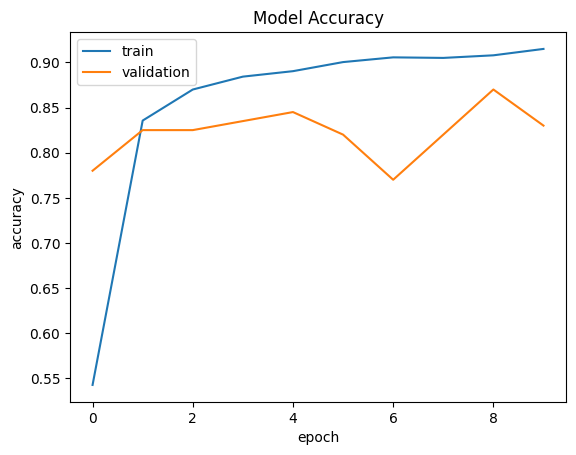

In [ ]:

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Visualizing Model Loss Over Epochs**

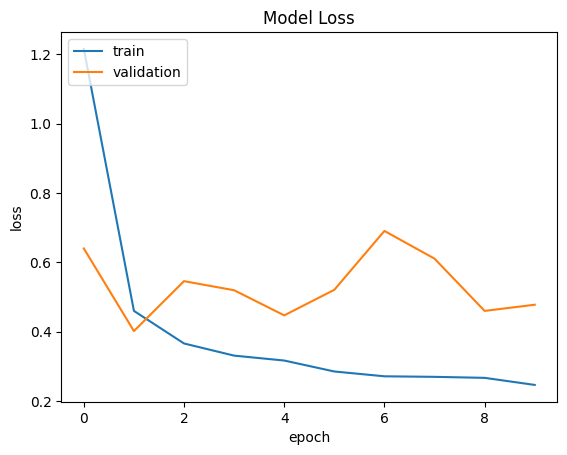

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model Evaluation

In [ ]:

pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)
print(classification_report(test_data.labels,pred))

4/4 [==============================] - 42s 14s/step
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.89      0.85      0.87        20
           2       0.83      0.95      0.88        20
           3       0.84      0.80      0.82        20
           4       0.94      0.80      0.86        20

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



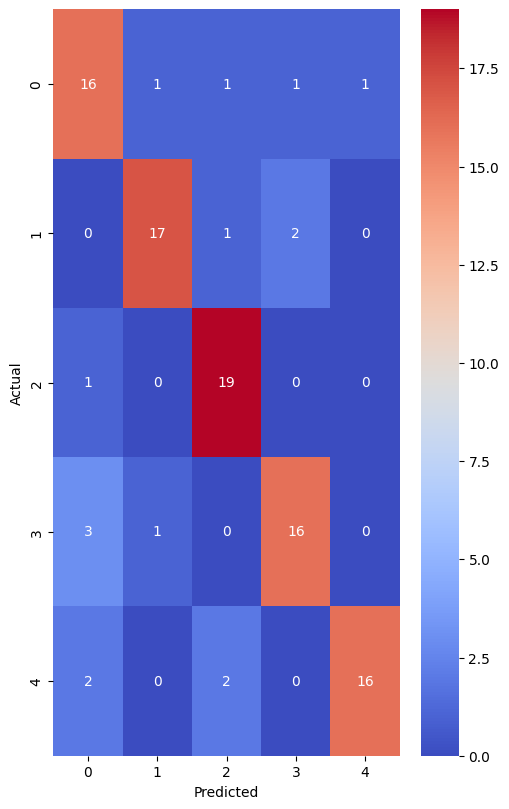

In [ ]:
con_mat_df = pd.DataFrame(confusion_matrix(test_data.labels, pred),
                          index=classes,
                          columns=classes)

# Create a figure with a specific size
figure = plt.figure(figsize=(5, 8))

# Visualize the confusion matrix using a heatmap with a light color map (e.g., 'Pastel1')
sns.heatmap(con_mat_df, annot=True, cmap='coolwarm', fmt='d')

# Adjust the plot layout
plt.tight_layout()

# Set labels for the heatmap
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Show the plot
plt.show()

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Deep/modelv2_3.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/MyDrive/Deep/modelv2_3.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

train_data.class_indices

{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}